In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('mcdonalds.csv')

In [ ]:
print("Variable Names:")
print(df.columns)

Variable Names:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
print("\nSample Size:")
print(len(df))


Sample Size:
1453


In [ ]:
print("\nFirst Three Rows:")
print(df.head(3))


First Three Rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
segmentation_data = df.iloc[:, :11]

In [ ]:
numeric_segmentation_data = segmentation_data.apply(lambda x: x.eq('Yes').astype(int))

In [ ]:
print("Average Value of Transformed Segmentation Variables:")
print(numeric_segmentation_data.mean())

Average Value of Transformed Segmentation Variables:
yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_segmentation_data)

In [ ]:
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Text(0, 0.5, 'Principal Component 2')

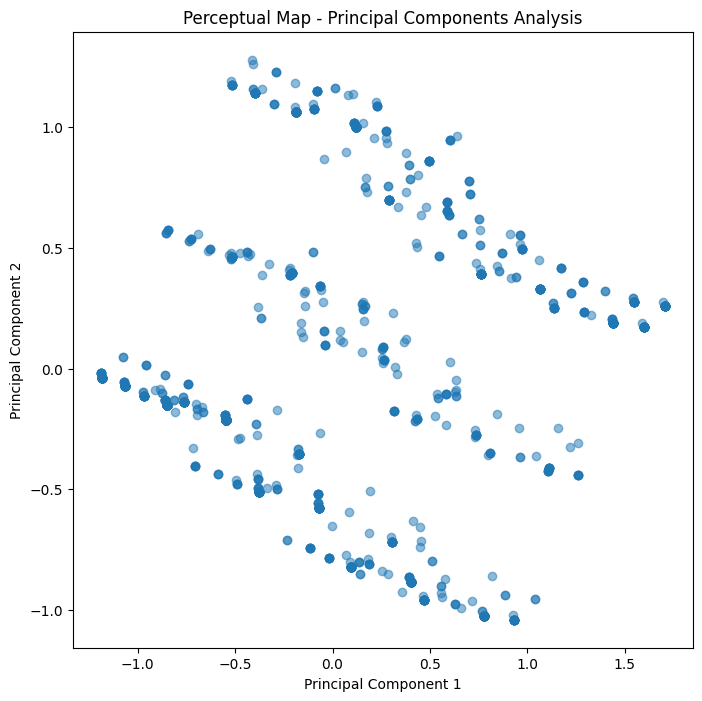

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.title('Perceptual Map - Principal Components Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

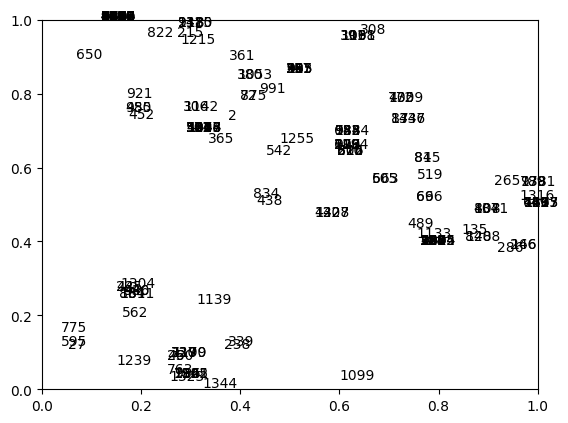

In [ ]:
for i, txt in enumerate(df.index):
    plt.annotate(txt, (pc_df['PC1'][i], pc_df['PC2'][i]))

plt.show()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio - PC1: {explained_variance_ratio[0]:.2f}')
print(f'Explained Variance Ratio - PC2: {explained_variance_ratio[1]:.2f}')

Explained Variance Ratio - PC1: 0.30
Explained Variance Ratio - PC2: 0.19


In [ ]:
factor_loadings = pca.components_.T

In [ ]:
print("Factor Loadings:")
print(factor_loadings)

Factor Loadings:
[[-0.47693349  0.36378978]
 [-0.15533159  0.016414  ]
 [-0.00635636  0.01880869]
 [ 0.11623168 -0.03409395]
 [ 0.3044427  -0.06383884]
 [-0.10849325 -0.0869722 ]
 [-0.33718593 -0.61063276]
 [-0.47151394  0.3073178 ]
 [ 0.32904173  0.60128596]
 [-0.21371062  0.07659344]
 [ 0.37475293 -0.13965633]]


In [ ]:
rotated_vars = np.dot(numeric_segmentation_data.values, factor_loadings)

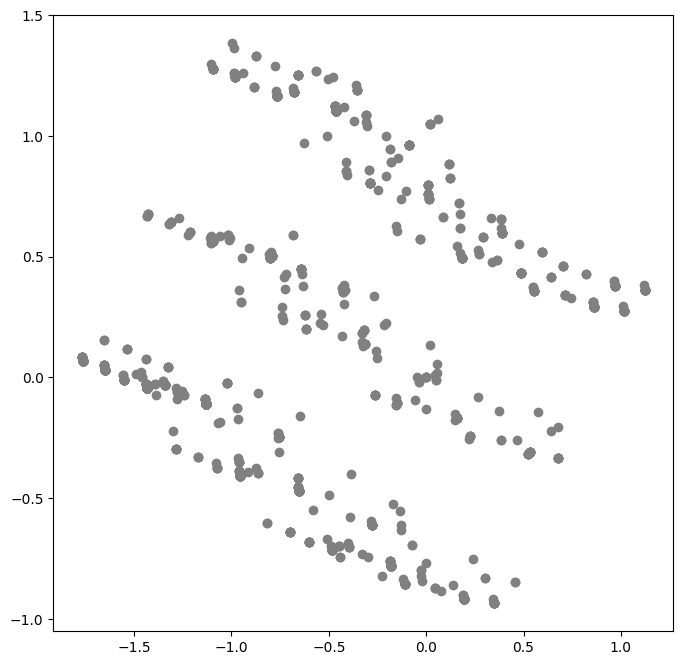

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(rotated_vars[:, 0], rotated_vars[:, 1], color='grey', label='Consumers')

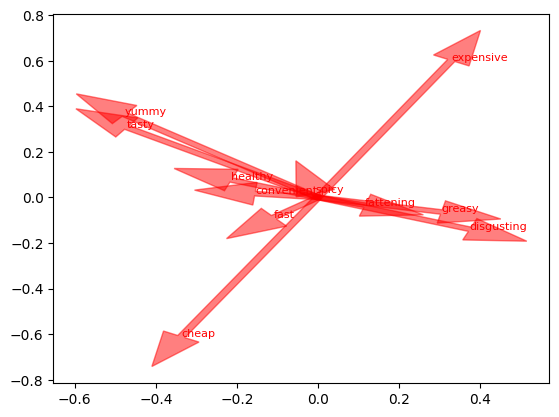

In [ ]:
for i in range(len(factor_loadings)):
    plt.arrow(0, 0, factor_loadings[i, 0], factor_loadings[i, 1], color='red', alpha=0.5, width=0.02, head_width=0.1)
    plt.text(factor_loadings[i, 0], factor_loadings[i, 1], segmentation_data.columns[i], color='red', fontsize=8)

Text(0.5, 1.0, 'Rotated and Projected Consumers with Segmentation Variables Arrows')

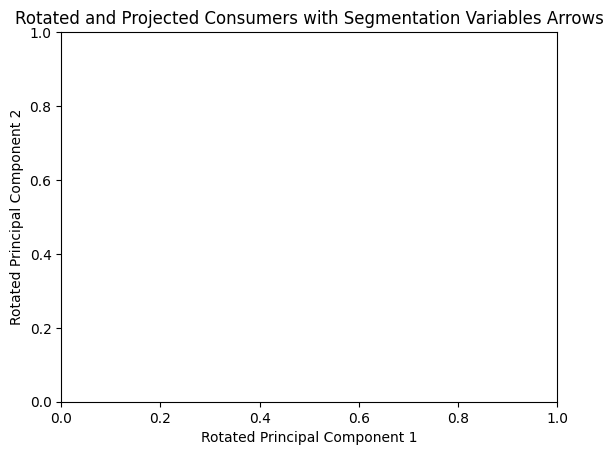

In [ ]:
plt.xlabel('Rotated Principal Component 1')
plt.ylabel('Rotated Principal Component 2')
plt.title('Rotated and Projected Consumers with Segmentation Variables Arrows')

In [ ]:
plt.show()

In [ ]:
#Using k-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_segments = 4

In [ ]:
kmeans = KMeans(n_clusters=num_segments, random_state=42)
segment_labels = kmeans.fit_predict(rotated_vars)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pc_df['Segment'] = segment_labels

In [ ]:
print(pc_df.head())

        PC1       PC2  Segment
0  0.425367 -0.219079        0
1 -0.218638  0.388190        1
2  0.375415  0.730435        1
3 -0.172926 -0.352752        2
4  0.187057 -0.807610        0


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
inertia_values = []

In [ ]:
min_clusters = 2
max_clusters = 8

for num_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(numeric_segmentation_data)

    # Calculate sum of squared distances (inertia) for the current clustering
    inertia_values.append(kmeans.inertia_)

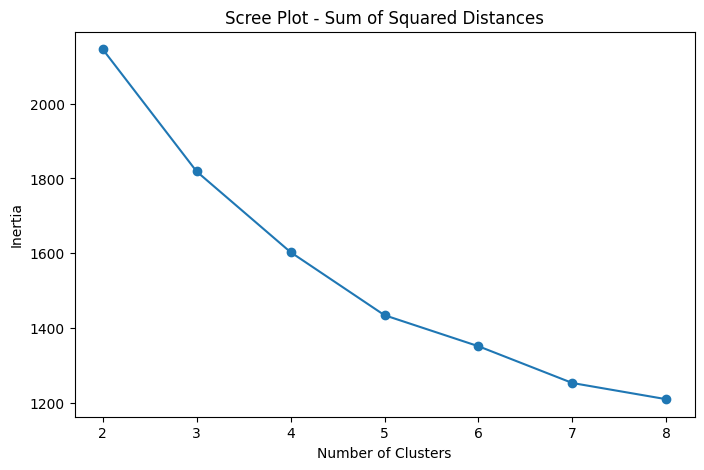

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.title('Scree Plot - Sum of Squared Distances')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.utils import resample

In [ ]:
n_bootstraps = 200

In [ ]:
n_init = 10

In [ ]:
min_clusters = 2
max_clusters = 8

In [ ]:
cluster_labels_bootstrap = np.zeros((n_bootstraps, max_clusters - min_clusters + 1, len(numeric_segmentation_data)))

In [ ]:
for i in range(n_bootstraps):
    # Generate a bootstrap sample
    bootstrap_sample = resample(numeric_segmentation_data, replace=True, random_state=i)

    for num_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=i)
        kmeans.fit(bootstrap_sample)

        # Store cluster labels
        cluster_labels_bootstrap[i, num_clusters - min_clusters, :] = kmeans.labels_


In [ ]:
stability_scores = np.zeros((max_clusters - min_clusters + 1,))
for num_clusters in range(min_clusters, max_clusters + 1):
    # Calculate the proportion of times each pair of observations is clustered together across bootstrap samples
    pair_agreement = np.sum(cluster_labels_bootstrap[:, num_clusters - min_clusters, :] == cluster_labels_bootstrap[:, num_clusters - min_clusters, None, :], axis=0) / n_bootstraps

    # Calculate the stability score for the current number of clusters
    stability_scores[num_clusters - min_clusters] = np.mean(pair_agreement)

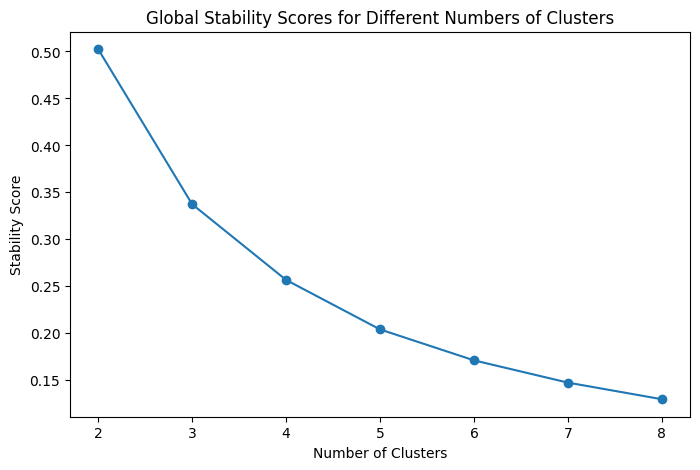

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(min_clusters, max_clusters + 1), stability_scores, marker='o')
plt.title('Global Stability Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Stability Score')
plt.show()

In [ ]:
stability_scores = cluster_labels_bootstrap[:, :, 0]

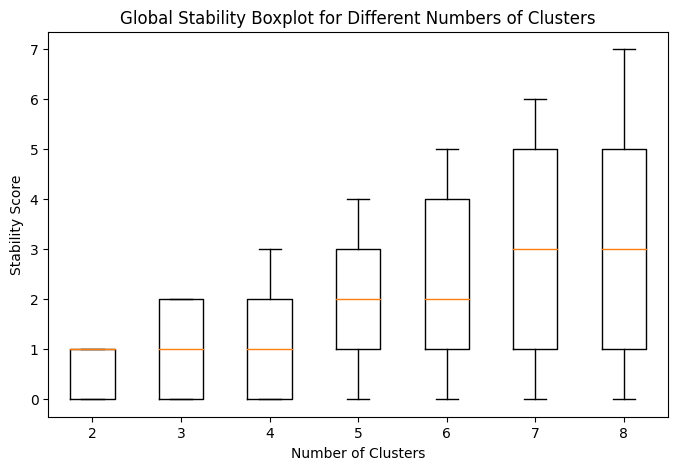

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(stability_scores, labels=range(min_clusters, max_clusters + 1))
plt.title('Global Stability Boxplot for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Stability Score')
plt.show()

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.set(style="white")

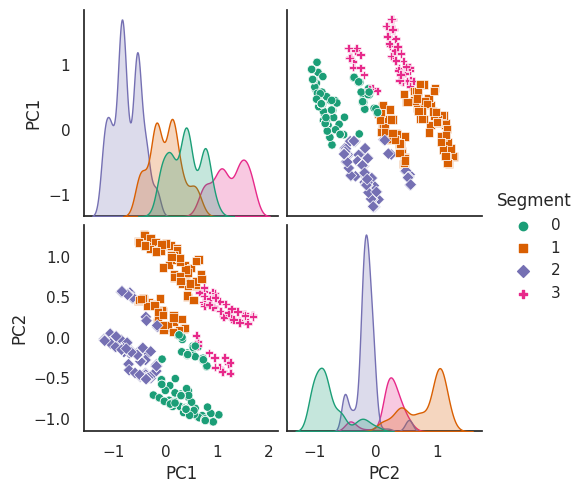

In [ ]:
sns.pairplot(pc_df, hue='Segment', palette='Dark2', markers=["o", "s", "D", "P"], diag_kind="kde")

In [ ]:
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
pairwise_distances_within_segments = []
for segment in range(num_segments):
    segment_data = rotated_vars[segment_labels == segment]
    pairwise_distances_within_segments.append(pairwise_distances(segment_data))

In [ ]:
similarity_values = []
segment_pairs = []

for i in range(num_segments):
    for j in range(i + 1, num_segments):
        min_data_points = min(pairwise_distances_within_segments[i].shape[0], pairwise_distances_within_segments[j].shape[0])
        similarity = 1 - pairwise_distances_within_segments[i][:min_data_points, :min_data_points] / pairwise_distances_within_segments[j][:min_data_points, :min_data_points]

        # Flatten the similarity matrix and store values and corresponding segment pairs
        similarity_values.extend(similarity.flatten())
        segment_pairs.extend([f'Segment {i+1} vs Segment {j+1}' for _ in range(min_data_points**2)])

<ipython-input-66-2ca3ec738031>:7: RuntimeWarning: divide by zero encountered in divide
  similarity = 1 - pairwise_distances_within_segments[i][:min_data_points, :min_data_points] / pairwise_distances_within_segments[j][:min_data_points, :min_data_points]
<ipython-input-66-2ca3ec738031>:7: RuntimeWarning: invalid value encountered in divide
  similarity = 1 - pairwise_distances_within_segments[i][:min_data_points, :min_data_points] / pairwise_distances_within_segments[j][:min_data_points, :min_data_points]


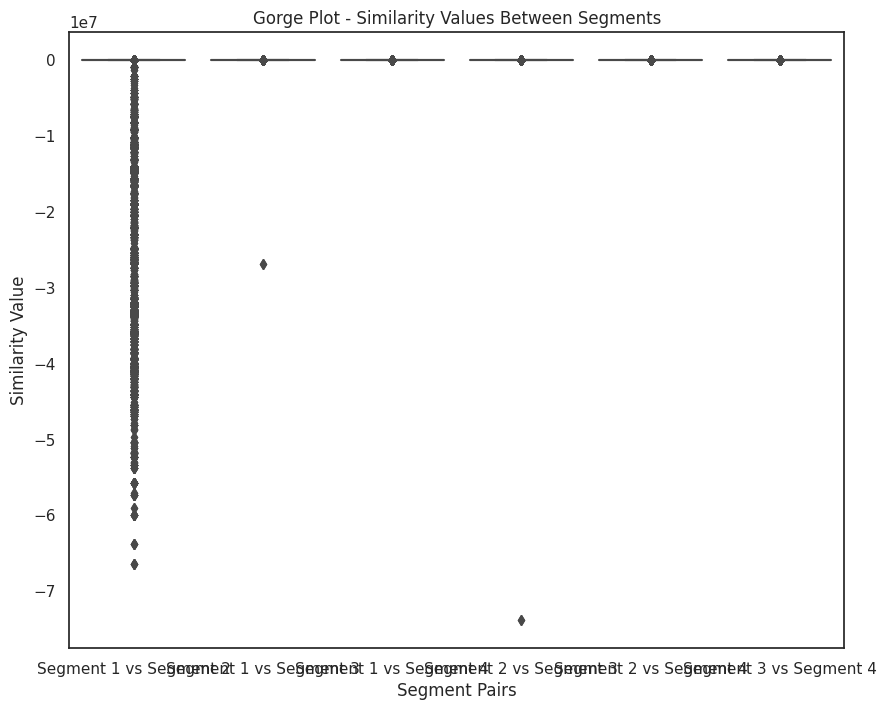

In [ ]:
data = pd.DataFrame({'Segment Pairs': segment_pairs, 'Similarity Values': similarity_values})

plt.figure(figsize=(10, 8))
sns.boxplot(x='Segment Pairs', y='Similarity Values', data=data)

plt.title('Gorge Plot - Similarity Values Between Segments')
plt.xlabel('Segment Pairs')
plt.ylabel('Similarity Value')

plt.show()

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00


In [ ]:
pip install segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
num_segments_range = range(min_clusters, max_clusters + 1)

In [ ]:
adj_rand_indices = np.zeros((len(num_segments_range), len(num_segments_range)))
for i, num_segments_i in enumerate(num_segments_range):
    for j, num_segments_j in enumerate(num_segments_range):
        if i <= j:
            labels_i = cluster_labels_bootstrap[i, num_segments_i - min_clusters, :]
            labels_j = cluster_labels_bootstrap[j, num_segments_j - min_clusters, :]
            adj_rand_indices[i, j] = adjusted_rand_score(labels_i, labels_j)
            adj_rand_indices[j, i] = adj_rand_indices[i, j]

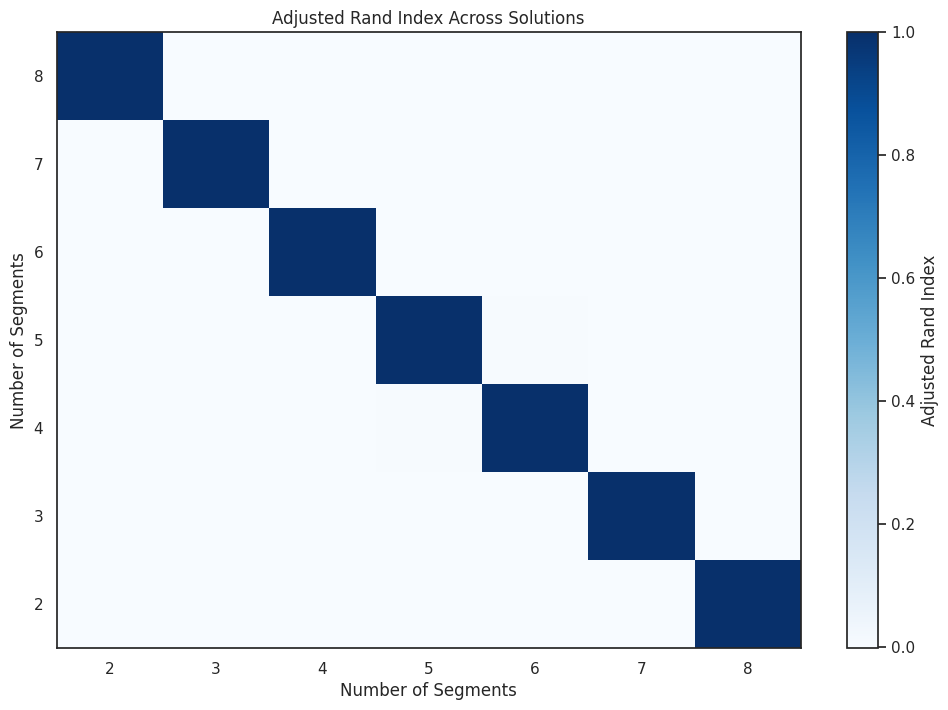

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(adj_rand_indices, cmap='Blues', aspect='auto', extent=[min_clusters-0.5, max_clusters+0.5, min_clusters-0.5, max_clusters+0.5])

plt.title('Adjusted Rand Index Across Solutions')
plt.xlabel('Number of Segments')
plt.ylabel('Number of Segments')

plt.colorbar(label='Adjusted Rand Index')
plt.show()

In [ ]:
from scipy.stats import mode

In [ ]:
segment_stabilities = np.zeros((num_segments, len(cluster_labels_bootstrap)))

In [ ]:
for i in range(num_segments):
    for j in range(len(cluster_labels_bootstrap)):
        labels_i = cluster_labels_bootstrap[j, i, :]
        segment_stabilities[i, j] = np.mean(labels_i == mode(labels_i)[0])

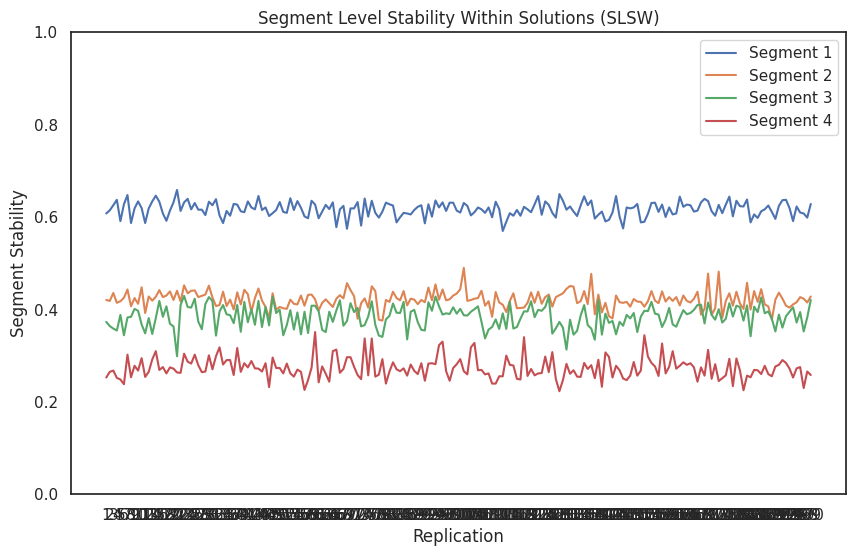

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(num_segments):
    plt.plot(segment_stabilities[i, :], label=f'Segment {i+1}')

plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.xlabel('Replication')
plt.ylabel('Segment Stability')
plt.ylim(0, 1)
plt.xticks(range(len(cluster_labels_bootstrap)), range(1, len(cluster_labels_bootstrap)+1))
plt.legend()
plt.show()

In [ ]:
# Using Mixtures of Distributions

In [ ]:
pip install mixmod

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [ ]:
min_segments = 2
max_segments = 8
n_init = 10
n_bootstraps = 200

inertia_values = []
silhouette_scores = []
cluster_labels_bootstrap = np.zeros((n_bootstraps, max_segments - min_segments + 1, len(numeric_segmentation_data)))

In [ ]:
for num_segments in range(min_segments, max_segments + 1):
    model = GaussianMixture(n_components=num_segments, n_init=n_init)
    model.fit(numeric_segmentation_data)

    inertia_values.append(model.bic(numeric_segmentation_data))

    silhouette_scores.append(silhouette_score(numeric_segmentation_data, model.predict(numeric_segmentation_data)))

    # Bootstrap stability analysis
    for i in range(n_bootstraps):

        bootstrap_sample = resample(numeric_segmentation_data, replace=True, random_state=i)

        bootstrap_model = GaussianMixture(n_components=num_segments, n_init=n_init)
        bootstrap_model.fit(bootstrap_sample)

        cluster_labels_bootstrap[i, num_segments - min_segments, :] = bootstrap_model.predict(bootstrap_sample)

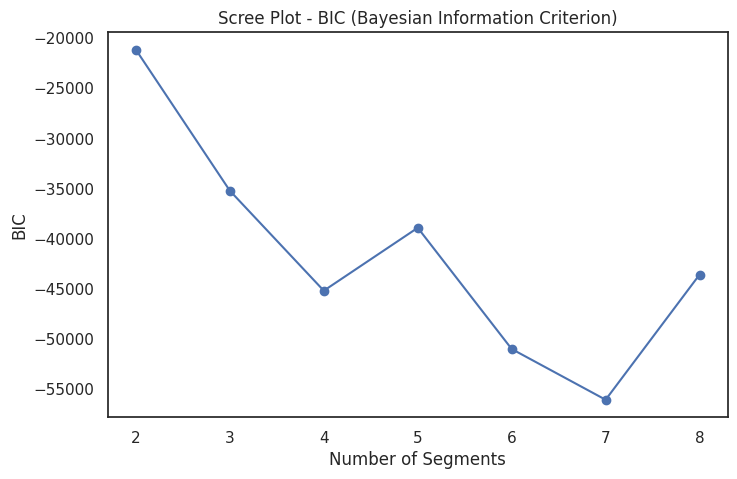

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(min_segments, max_segments + 1), inertia_values, marker='o')
plt.title('Scree Plot - BIC (Bayesian Information Criterion)')
plt.xlabel('Number of Segments')
plt.ylabel('BIC')
plt.show()

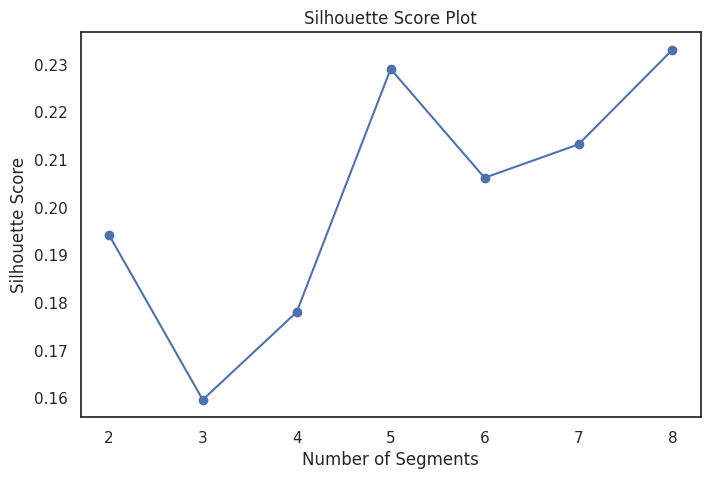

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(min_segments, max_segments + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Segments')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
stability_scores = np.zeros((max_segments - min_segments + 1,))
for num_segments in range(min_segments, max_segments + 1):
    pair_agreement = np.sum(cluster_labels_bootstrap[:, num_segments - min_segments, :] == cluster_labels_bootstrap[:, num_segments - min_segments, None, :], axis=0) / n_bootstraps
    stability_scores[num_segments - min_segments] = np.mean(pair_agreement)

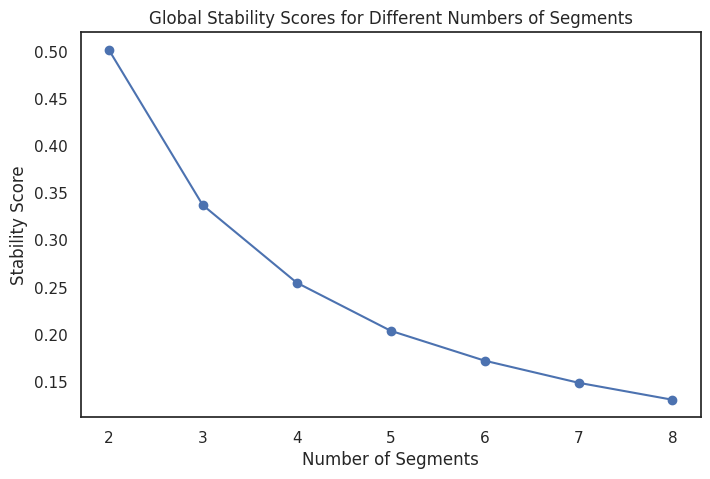

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(min_segments, max_segments + 1), stability_scores, marker='o')
plt.title('Global Stability Scores for Different Numbers of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Stability Score')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
min_components = 2
max_components = 10  # Adjust as needed

aic_values = []
bic_values = []
icl_values = []

In [ ]:
for num_components in range(min_components, max_components + 1):
    model = GaussianMixture(n_components=num_components, random_state=42)
    model.fit(numeric_segmentation_data)

    aic_values.append(model.aic(numeric_segmentation_data))
    bic_values.append(model.bic(numeric_segmentation_data))

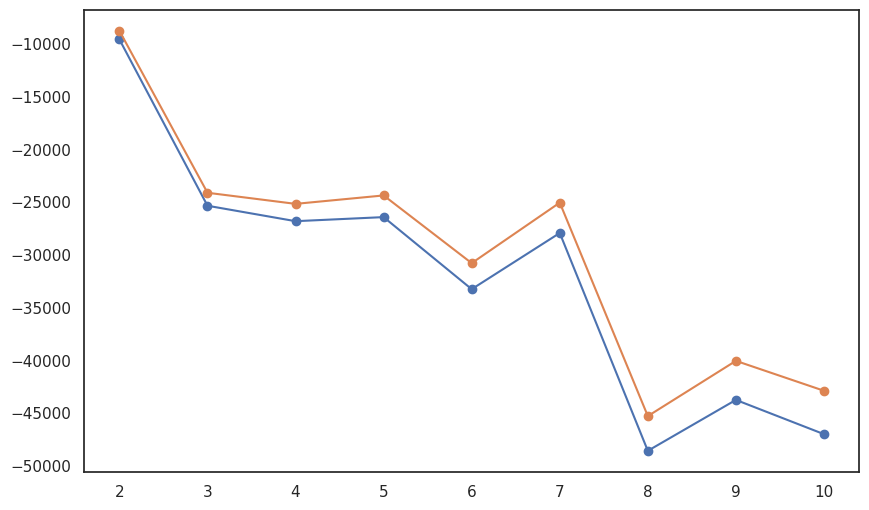

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(min_components, max_components + 1), aic_values, label='AIC', marker='o')
plt.plot(range(min_components, max_components + 1), bic_values, label='BIC', marker='o')

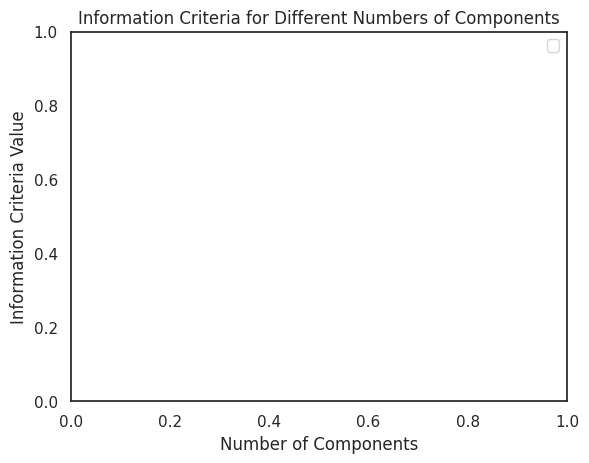

In [ ]:
plt.title('Information Criteria for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
num_clusters_kmeans = 4  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(numeric_segmentation_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
num_components_gmm = 4  # Adjust as needed
gmm = GaussianMixture(n_components=num_components_gmm, random_state=42)
gmm.fit(numeric_segmentation_data)
component_memberships_gmm = gmm.predict_proba(numeric_segmentation_data)

In [ ]:
comparison_df = pd.DataFrame(component_memberships_gmm, columns=[f'Component {i+1}' for i in range(num_components_gmm)])
comparison_df['Cluster Membership (k-means)'] = cluster_labels_kmeans

In [ ]:
crosstab_df = pd.crosstab(comparison_df['Cluster Membership (k-means)'], columns=comparison_df.iloc[:, :-1].idxmax(axis=1))

In [ ]:
print(crosstab_df)

col_0                         Component 1  Component 2  Component 3  \
Cluster Membership (k-means)                                          
0                                       4          517           46   
1                                     209            0           29   
2                                      37            0          282   
3                                     229           29            0   

col_0                         Component 4  
Cluster Membership (k-means)               
0                                      13  
1                                       8  
2                                       4  
3                                      46  


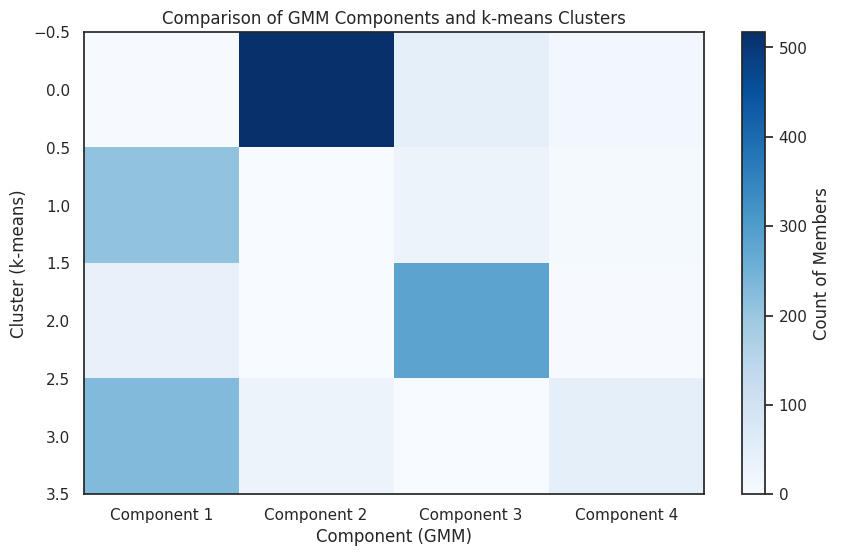

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(crosstab_df.values, cmap='Blues', aspect='auto', interpolation='none')
plt.colorbar(label='Count of Members')
plt.xlabel('Component (GMM)')
plt.ylabel('Cluster (k-means)')
plt.title('Comparison of GMM Components and k-means Clusters')
plt.xticks(np.arange(num_components_gmm), labels=[f'Component {i+1}' for i in range(num_components_gmm)])
plt.show()

In [ ]:
#Using Mixtures of Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
independent_variables = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

In [ ]:
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting  Like  Age      VisitFrequency  Gender  Numeric_LIKE  \
0         No  -3.0   61  Every three months  Female           9.0   
1         No   2.0   51  Every three months  Female           4.0   
2         No   1.0   62  Every three months  Female           5.0   
3        Yes   4.0   69         Once a week  Female           2.0   
4         No   2.0   49        Once a month    Male           4.0   

   NumericLike  Like.n  
0            9       9  
1            4       4  
2            5       5  
3   

In [ ]:
original_like_counts = df['Like'].value_counts(sort=False)
print(original_like_counts)

-3.0     73
 2.0    187
 1.0    152
 4.0    160
 0.0    464
-2.0     59
 3.0    229
-4.0     71
-1.0     58
Name: Like, dtype: int64


In [ ]:
df['Like.n'] = 6 - df['Like'].astype(int)

In [ ]:
new_like_counts = df['Like.n'].value_counts(sort=False)
print(new_like_counts)

9      73
4     187
5     152
2     160
6     464
8      59
3     229
10     71
7      58
Name: Like.n, dtype: int64


In [ ]:
import statsmodels.api as sm

In [ ]:
categorical_columns = ['Gender']

In [ ]:
numeric_columns = ['Age', 'VisitFrequency']

In [ ]:
print(df.dtypes)

yummy              object
convenient         object
spicy              object
fattening          object
greasy             object
fast               object
cheap              object
tasty              object
expensive          object
healthy            object
disgusting         object
Like              float64
Age                 int64
VisitFrequency     object
Gender             object
Numeric_LIKE      float64
NumericLike         int64
Like.n              int64
dtype: object


In [ ]:
df['VisitFrequency'] = pd.to_numeric(df['VisitFrequency'], errors='coerce')

In [ ]:
print(df.dtypes)

yummy              object
convenient         object
spicy              object
fattening          object
greasy             object
fast               object
cheap              object
tasty              object
expensive          object
healthy            object
disgusting         object
Like              float64
Age                 int64
VisitFrequency    float64
Gender             object
Numeric_LIKE      float64
NumericLike         int64
Like.n              int64
dtype: object


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_components = 2

In [ ]:
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
independent_variables_imputed = imputer.fit_transform(independent_variables)

In [ ]:
gmm = GaussianMixture(n_components=num_components, random_state=42)
gmm.fit(independent_variables_imputed)

GaussianMixture(n_components=2, random_state=42)

In [ ]:
pip install pymer4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.9/136.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.15-cp310-cp310-linux_x86_64.whl size=329862 sha256=c11395a8ad92eeeeafb1c2d5c2ad1069eedd2db48507b2aa0e19064dfe05a1e4
  Stored in directory: /root/.cache/pip/wheels/af/93/69/c4904a387a34629ae40162ce1e61479cdd4ae3fd40078a9db3
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
import pymer4

In [ ]:
pip install seaborn matplotlib

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression

In [ ]:
num_components = 2
gmm = GaussianMixture(n_components=num_components, random_state=42)
gmm.fit(independent_variables_imputed)

GaussianMixture(n_components=2, random_state=42)

In [ ]:
cluster_labels = gmm.predict(independent_variables_imputed)

In [ ]:
dependent_variable = df['Like']

# Fit linear regression models for each cluster
regression_models = {}
for cluster in range(num_components):
    cluster_data = independent_variables_imputed[cluster_labels == cluster]
    dependent_variable_cluster = dependent_variable[cluster_labels == cluster]

    model = LinearRegression().fit(cluster_data, dependent_variable_cluster)
    regression_models[cluster] = model

    print(f"\nRegression Coefficients for Cluster {cluster + 1}:")
    for feature, coef in zip(independent_variables.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")



Regression Coefficients for Cluster 1:
Like: 0.2500
Age: 0.0000
VisitFrequency: -0.2500
Numeric_LIKE: -0.2500
NumericLike: -0.2500
Like.n: -0.0000
yummy_Yes: -0.0000
convenient_Yes: -0.0000
spicy_Yes: 0.0000
fattening_Yes: 0.0000
greasy_Yes: -0.0000
fast_Yes: 0.0000
cheap_Yes: -0.0000
tasty_Yes: 0.0000
expensive_Yes: -0.0000
healthy_Yes: 0.0000
disgusting_Yes: 0.0000

Regression Coefficients for Cluster 2:
Like: 0.2500
Age: 0.0000
VisitFrequency: -0.2500
Numeric_LIKE: -0.2500
NumericLike: -0.2500
Like.n: -0.0000
yummy_Yes: 0.0000
convenient_Yes: 0.0000
spicy_Yes: 0.0000
fattening_Yes: -0.0000
greasy_Yes: 0.0000
fast_Yes: 0.0000
cheap_Yes: -0.0000
tasty_Yes: 0.0000
expensive_Yes: -0.0000
healthy_Yes: -0.0000
disgusting_Yes: -0.0000


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [ ]:
attributes_data = segmentation_data.iloc[:, 1:]

In [ ]:
attributes_data_encoded = pd.get_dummies(attributes_data, columns=attributes_data.select_dtypes(include=['object']).columns)

In [ ]:
linkage_matrix = hierarchy.linkage(attributes_data_encoded.T, method='ward')

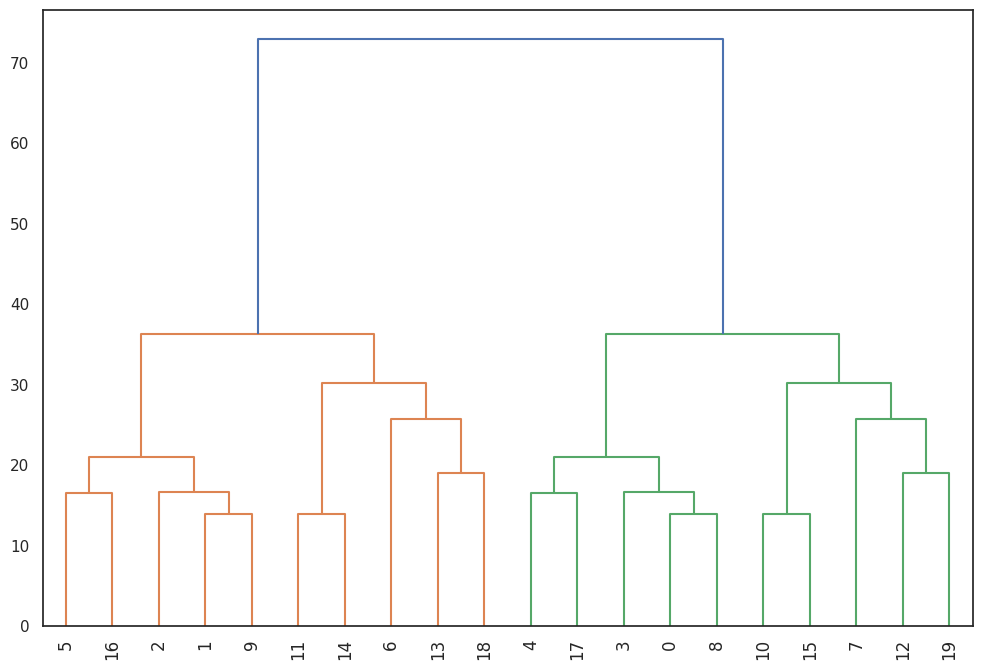

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix, orientation='top', leaf_rotation=90)

In [ ]:
num_clusters = 4
cluster_labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit_predict(attributes_data_encoded.T)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


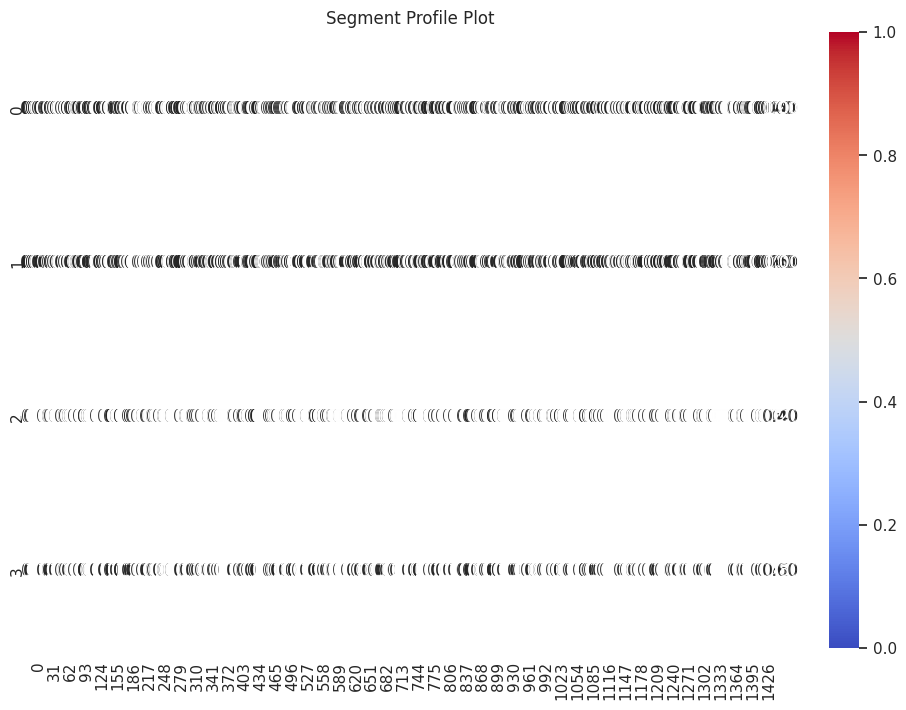

In [ ]:
if len(cluster_labels) == len(attributes_data_encoded.columns):

    attributes_data_encoded.columns = [f'{col}_Cluster{cluster}' for col, cluster in zip(attributes_data_encoded.columns, cluster_labels)]

    numeric_cluster_labels = [int(label.split('Cluster')[-1]) for label in attributes_data_encoded.columns]

    plt.figure(figsize=(12, 8))
    sns.heatmap(attributes_data_encoded.groupby(numeric_cluster_labels, axis=1).mean().T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Segment Profile Plot')
    plt.show()
else:
    print("Error: Length of cluster labels does not match the number of attributes.")

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
MD_x_transposed = df.T

In [ ]:
MD_x_encoded = pd.get_dummies(MD_x_transposed)

In [ ]:
linkage_matrix = linkage(MD_x_encoded, method='average')

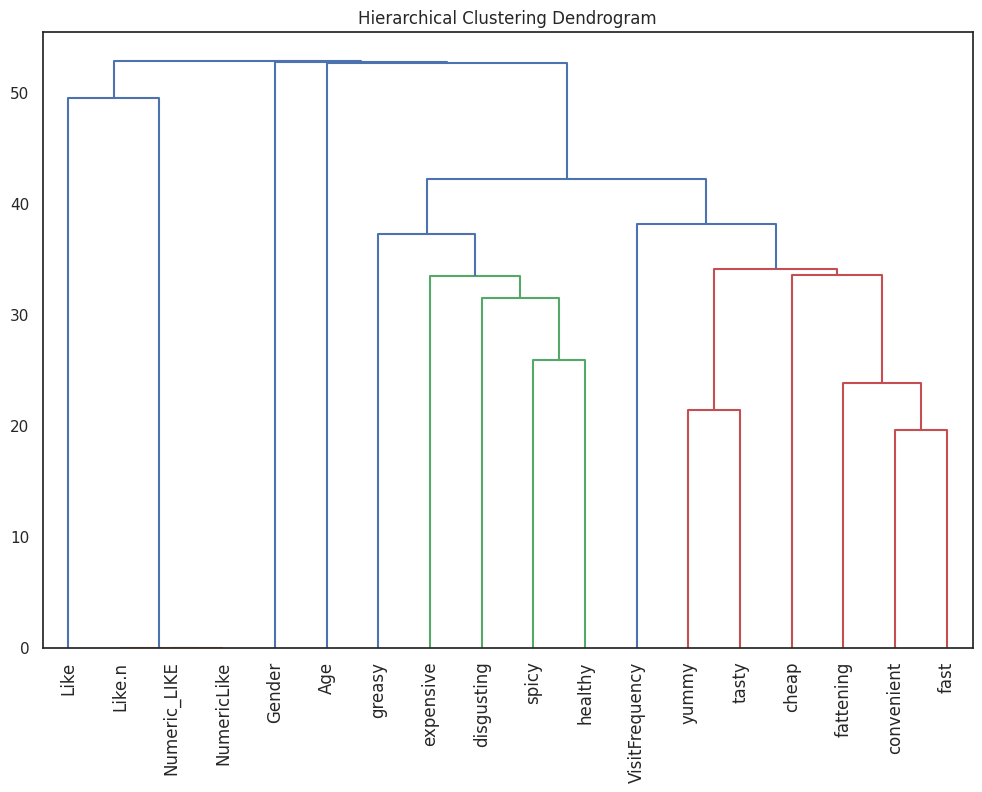

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=MD_x_transposed.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Text(0, 0.5, 'Principal Component 2')

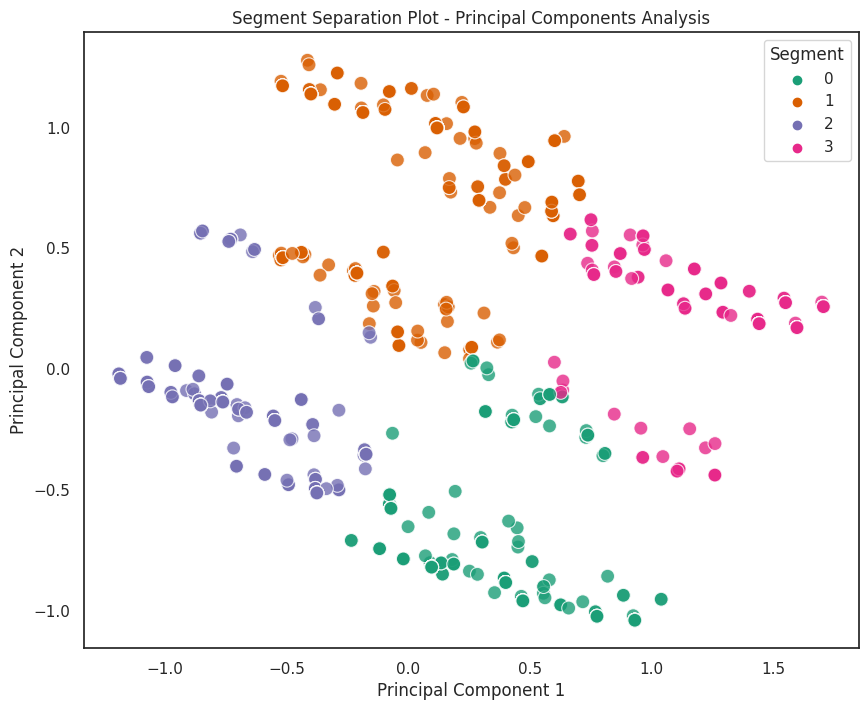

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pc_df, palette='Dark2', s=100, alpha=0.8)
plt.title('Segment Separation Plot - Principal Components Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

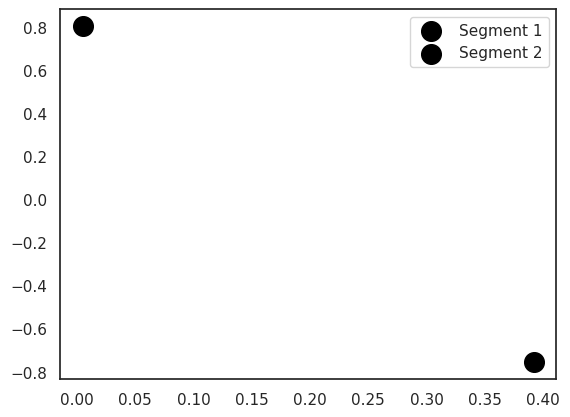

In [ ]:
for i in range(num_segments):
    segment_center = pc_df[pc_df['Segment'] == i][['PC1', 'PC2']].mean()
    plt.scatter(segment_center[0], segment_center[1], marker='o', color='black', s=200, label=f'Segment {i + 1}')

plt.legend()
plt.show()

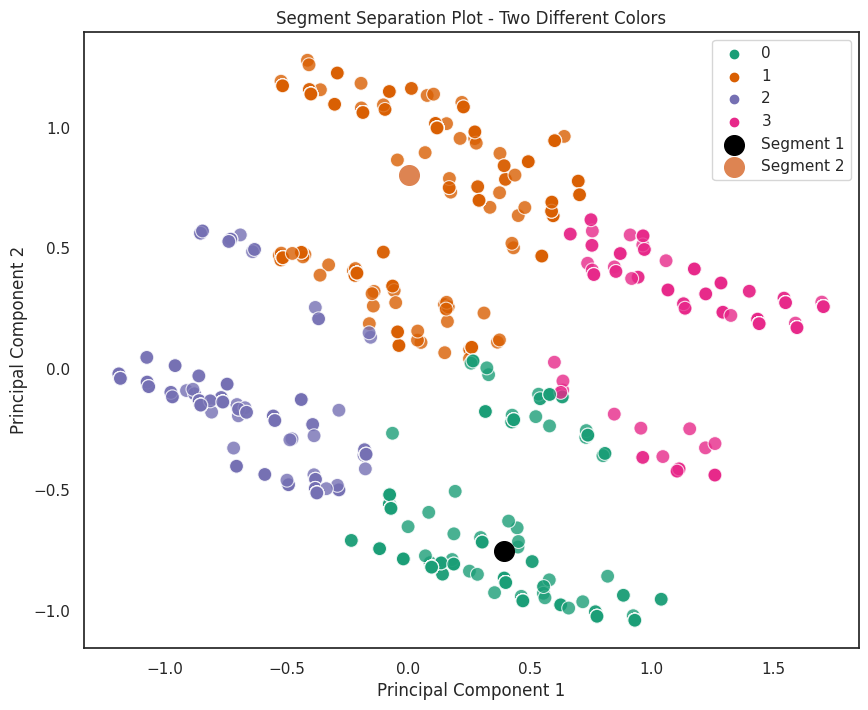

In [ ]:
color_segments = [1, 2]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pc_df, palette='Dark2', s=100, alpha=0.8)

for i in range(num_segments):
    segment_center = pc_df[pc_df['Segment'] == i][['PC1', 'PC2']].mean()
    if i in color_segments:
        plt.scatter(segment_center[0], segment_center[1], marker='o', s=200, label=f'Segment {i + 1}', color=f'C{i}')
    else:
        plt.scatter(segment_center[0], segment_center[1], marker='o', color='black', s=200, label=f'Segment {i + 1}')

plt.legend()
plt.title('Segment Separation Plot - Two Different Colors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
merged_df = pd.merge(pc_df[['Segment']], df[['Like']], left_index=True, right_index=True)

<Figure size 1000x800 with 0 Axes>

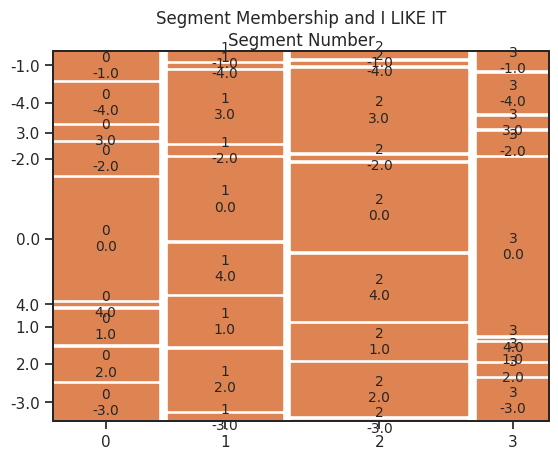

In [ ]:
plt.figure(figsize=(10, 8))
mosaic(merged_df, ['Segment', 'Like'], title='Segment Membership and I LIKE IT', gap=0.02, properties=lambda key: {'color': 'C0' if key[1] == 'No' else 'C1'})
plt.xlabel('Segment Number')
plt.show()

In [ ]:
merged_df_gender = pd.merge(pc_df[['Segment']], df[['Gender']], left_index=True, right_index=True)

<Figure size 1000x800 with 0 Axes>

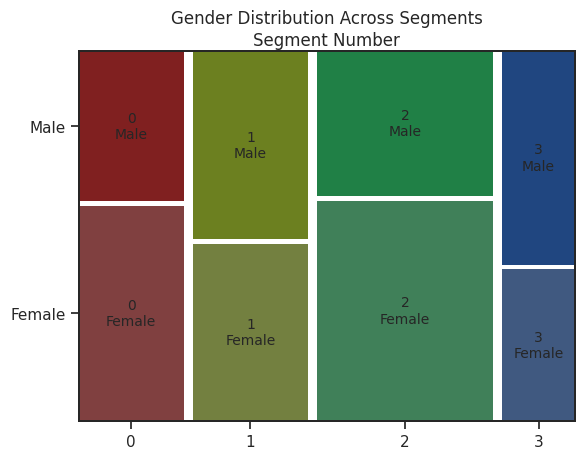

In [ ]:
plt.figure(figsize=(10, 8))
mosaic(merged_df_gender, ['Segment', 'Gender'], title='Gender Distribution Across Segments', gap=0.02)
plt.xlabel('Segment Number')
plt.show()

In [ ]:
merged_df_age = pd.merge(pc_df[['Segment']], df[['Age']], left_index=True, right_index=True)

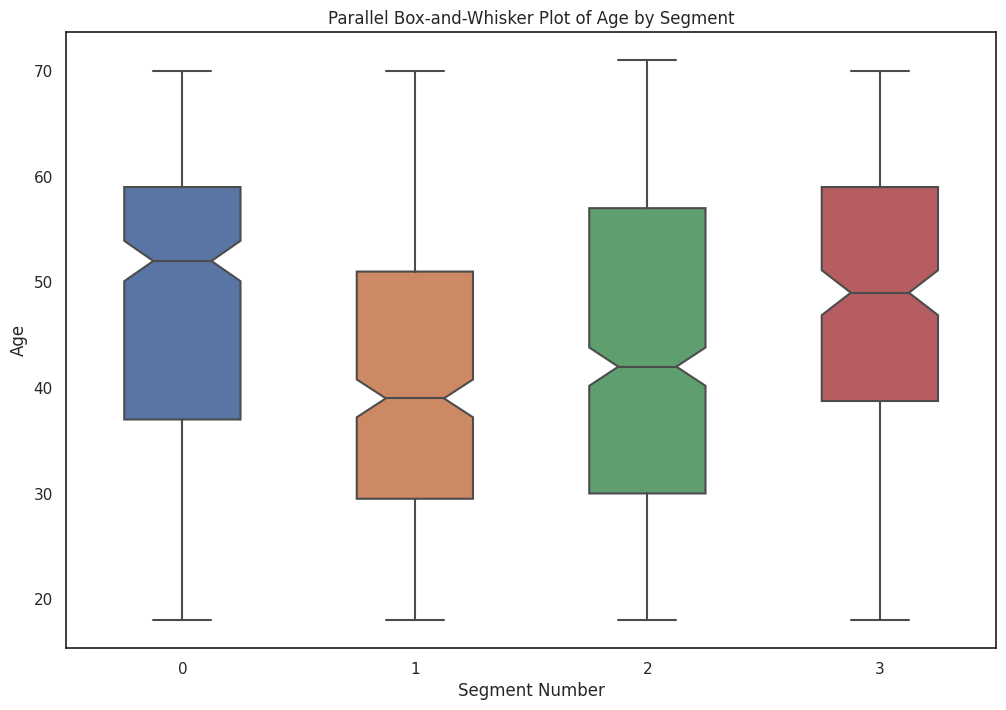

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Segment', y='Age', data=merged_df_age, width=0.5, notch=True)
plt.title('Parallel Box-and-Whisker Plot of Age by Segment')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.show()